<a href="https://colab.research.google.com/github/DEE-D4C/project1/blob/main/MLproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X,y=mnist.data,mnist.target

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib.pyplot as plt
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

<function matplotlib.pyplot.show(close=None, block=None)>

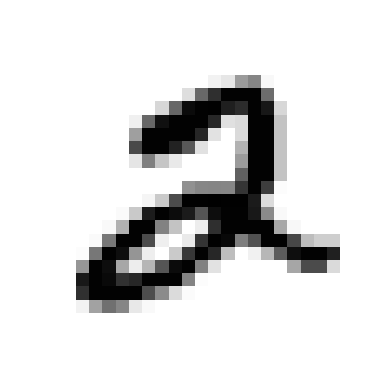

In [14]:
some_digit = X[5]
plot_digit(some_digit)
plt.show

In [15]:
y[5]

'2'

In [16]:
X_train=X[:60000]
y_train=y[:60000]
X_test=X[60000:]
y_test=y[60000:]